In [80]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading DataSet

In [81]:
df = pd.read_csv("DataSets/Titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Data Preprocessing

In [83]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


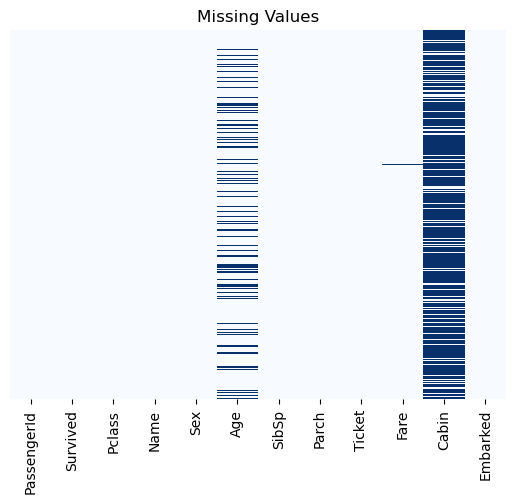

In [84]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap="Blues", data=df)
plt.title("Missing Values")
plt.show()

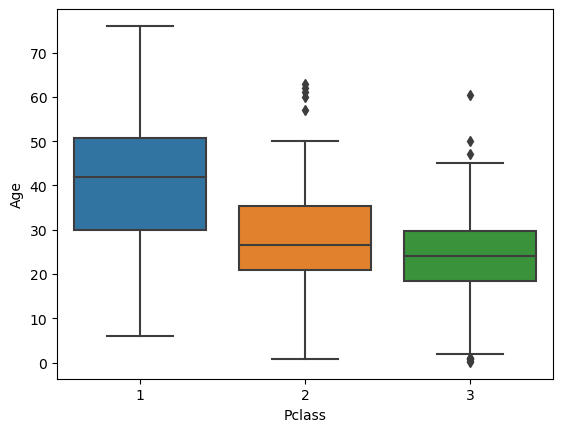

In [85]:
sns.boxplot(x="Pclass",y="Age",data=df)
plt.show()

In [86]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 44
        if Pclass == 2:
            return 36
        if Pclass == 3:
            return 32
    else:
        return Age
df["Age"] = df[["Age","Pclass"]].apply(impute_age,axis=1)

In [87]:
df = df.dropna()

In [88]:
df = df.drop(["Cabin"],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,S


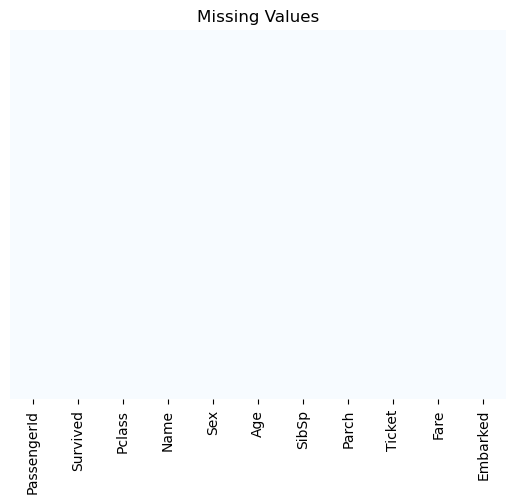

In [89]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap="Blues", data=df)
plt.title("Missing Values")
plt.show()

In [90]:
df.count()

PassengerId    91
Survived       91
Pclass         91
Name           91
Sex            91
Age            91
SibSp          91
Parch          91
Ticket         91
Fare           91
Embarked       91
dtype: int64

In [91]:
objcat=["Sex","Embarked"]
for colname in objcat:
    df[colname] = df[colname].astype("category")

In [92]:
df.select_dtypes(["category"]).columns

Index(['Sex', 'Embarked'], dtype='object')

In [93]:
sex = pd.get_dummies(df["Sex"],drop_first=True)
embarked = pd.get_dummies(df["Embarked"],drop_first=True)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,S


In [94]:
df = pd.concat([df,sex,embarked],axis=1)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,S,0,0,1
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,S,0,0,1
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,C,0,0,0
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,C,0,0,0
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,S,1,0,1


In [95]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1101.978022,0.483516,1.164835,39.236264,0.571429,0.461538,94.903162,0.516484,0.010989,0.450549
std,125.995853,0.502497,0.477580,14.917056,0.634960,0.847319,87.569238,0.502497,0.104828,0.500305
min,904.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,986.000000,0.000000,1.000000,27.500000,0.000000,0.000000,30.100000,0.000000,0.000000,0.000000
50%,1094.000000,0.000000,1.000000,39.000000,1.000000,0.000000,61.979200,1.000000,0.000000,0.000000
75%,1213.500000,1.000000,1.000000,50.000000,1.000000,1.000000,134.500000,1.000000,0.000000,1.000000
max,1306.000000,1.000000,3.000000,76.000000,3.000000,4.000000,512.329200,1.000000,1.000000,1.000000


In [96]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,1.000000,-0.050373,0.051579,0.042783,-0.079422,-0.116470,-0.093826,0.050373,0.169109,-0.028220
Survived,-0.050373,1.000000,-0.104301,0.023131,0.203969,0.200740,0.208024,-1.000000,0.108944,0.051967
Pclass,0.051579,-0.104301,1.000000,-0.393101,-0.167501,-0.025346,-0.319487,0.104301,-0.036583,0.104247
Age,0.042783,0.023131,-0.393101,1.000000,0.061838,0.051054,0.180361,-0.023131,-0.015890,-0.010700
SibSp,-0.079422,0.203969,-0.167501,0.061838,1.000000,0.268477,0.239002,-0.203969,0.071541,0.159892
Parch,-0.116470,0.200740,-0.025346,0.051054,0.268477,1.000000,0.406947,-0.200740,-0.057735,0.028227
Fare,-0.093826,0.208024,-0.319487,0.180361,0.239002,0.406947,1.000000,-0.208024,-0.005935,-0.212158
male,0.050373,-1.000000,0.104301,-0.023131,-0.203969,-0.200740,-0.208024,1.000000,-0.108944,-0.051967
Q,0.169109,0.108944,-0.036583,-0.015890,0.071541,-0.057735,-0.005935,-0.108944,1.000000,-0.095452
S,-0.028220,0.051967,0.104247,-0.010700,0.159892,0.028227,-0.212158,-0.051967,-0.095452,1.000000


In [97]:
df = df.drop(["PassengerId","Name","Ticket","Sex","Embarked"],axis=1)
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
12,1,1,23.0,1,0,82.2667,0,0,1
14,1,1,47.0,1,0,61.1750,0,0,1
24,1,1,48.0,1,3,262.3750,0,0,0
26,1,1,22.0,0,1,61.9792,0,0,0
28,0,1,41.0,0,0,30.5000,1,0,1


# Data Splitting into Training and Testing Data

In [98]:
x = df.drop(["Survived"],axis=1)
y = df["Survived"]

In [99]:
print("Shape of the input(x): ",x.shape)

Shape of the input(x):  (91, 8)


In [100]:
print("Shape of the output(y): ",y.shape)

Shape of the output(y):  (91,)


In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=101)

# Training Model

In [109]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(x_train,y_train)

E:\Users\itssa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
y_pred_lreg = lreg.predict(x_test)
print(y_pred_lreg.shape)
print(y_pred_lreg)

(23,)
[0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0]


In [111]:
probabilities = lreg.predict_proba(x_test)[:,1]
print(probabilities)

[0.13112372 0.10419414 0.16940388 0.14034303 0.17585081 0.22296056
 0.30973961 0.10367344 0.27174044 0.87696976 0.9248964  0.10667239
 0.82965372 0.90018725 0.12134797 0.96441179 0.21168598 0.07710719
 0.95082754 0.90756503 0.88845828 0.90311174 0.11067837]


In [112]:
for i in range(len(y_test)):
    print(round(probabilities[i],3),"--->", y_pred_lreg[i])

0.131 ---> 0
0.104 ---> 0
0.169 ---> 0
0.14 ---> 0
0.176 ---> 0
0.223 ---> 0
0.31 ---> 0
0.104 ---> 0
0.272 ---> 0
0.877 ---> 1
0.925 ---> 1
0.107 ---> 0
0.83 ---> 1
0.9 ---> 1
0.121 ---> 0
0.964 ---> 1
0.212 ---> 0
0.077 ---> 0
0.951 ---> 1
0.908 ---> 1
0.888 ---> 1
0.903 ---> 1
0.111 ---> 0


# Accuracy of the Model 

In [113]:
from sklearn.metrics import classification_report, accuracy_score
print("Classification Model")
print("---"*30)
logreg_accuracy = round(accuracy_score(y_test,y_pred_lreg)*100,2)
print("Accuracy",logreg_accuracy,"%")

Classification Model
------------------------------------------------------------------------------------------
Accuracy 100.0 %
